In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv(r"C:\Users\Akshaya\Downloads\expenses.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# Aggregating with mean, sum, count, and other functions

# Grouping by 'sex' and applying multiple aggregate functions
agg_sex = df.groupby('sex')['charges'].agg(['mean', 'sum', 'count', 'min', 'max'])

# Grouping by 'smoker' and applying multiple aggregate functions
agg_smoker = df.groupby('smoker')['charges'].agg(['mean', 'sum', 'count', 'min', 'max'])

# Grouping by 'region' and applying multiple aggregate functions
agg_region = df.groupby('region')['charges'].agg(['mean', 'sum', 'count', 'min', 'max'])

# Display the results
print("Aggregated by Sex:\n", agg_sex)
print("\nAggregated by Smoker:\n", agg_smoker)
print("\nAggregated by Region:\n", agg_region)

Aggregated by Sex:
                 mean           sum  count        min          max
sex                                                              
female  12569.578844  8.321061e+06    662  1607.5101  63770.42801
male    13956.751178  9.434764e+06    676  1121.8739  62592.87309

Aggregated by Smoker:
                 mean           sum  count         min          max
smoker                                                            
no       8434.268298  8.974061e+06   1064   1121.8739  36910.60803
yes     32050.231832  8.781764e+06    274  12829.4551  63770.42801

Aggregated by Region:
                    mean           sum  count        min          max
region                                                              
northeast  13406.384516  4.343669e+06    324  1694.7964  58571.07448
northwest  12417.575374  4.035712e+06    325  1621.3402  60021.39897
southeast  14735.411438  5.363690e+06    364  1121.8739  63770.42801
southwest  12346.937377  4.012755e+06    325  1241.5650

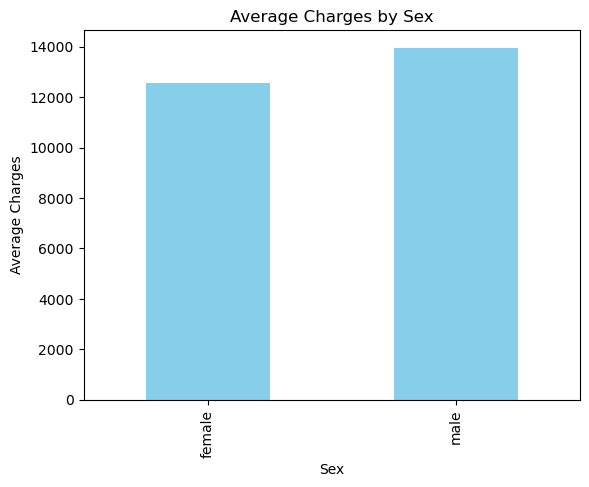

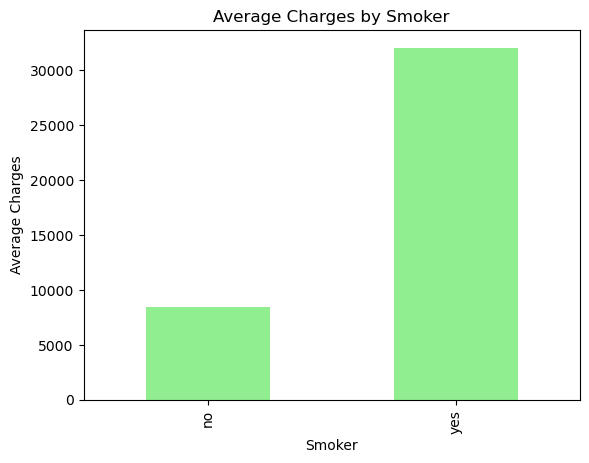

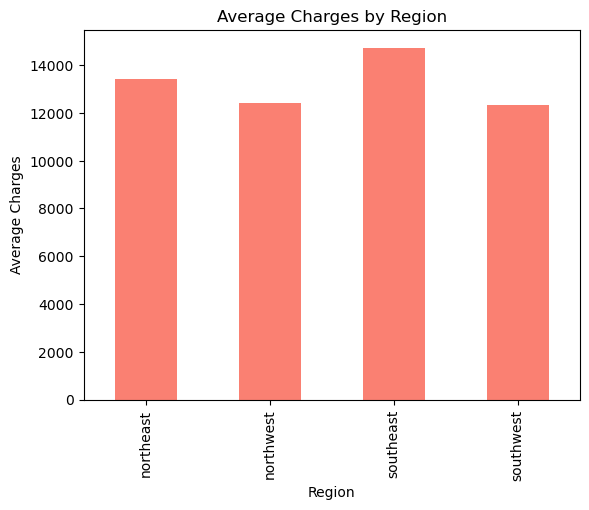

In [9]:
# Plotting average charges by sex
agg_sex['mean'].plot(kind='bar', color='skyblue', title="Average Charges by Sex")
plt.xlabel('Sex')
plt.ylabel('Average Charges')
plt.show()

# Plotting average charges by smoker
agg_smoker['mean'].plot(kind='bar', color='lightgreen', title="Average Charges by Smoker")
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.show()

# Plotting average charges by region
agg_region['mean'].plot(kind='bar', color='salmon', title="Average Charges by Region")
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()


In [10]:
df.shape  # Returns the number of rows and columns

(1338, 7)

In [11]:
df['sex'].value_counts()
df['smoker'].value_counts()
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

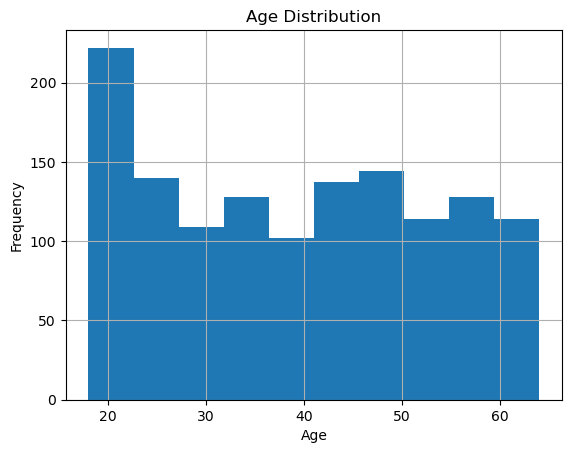

In [12]:
df['age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

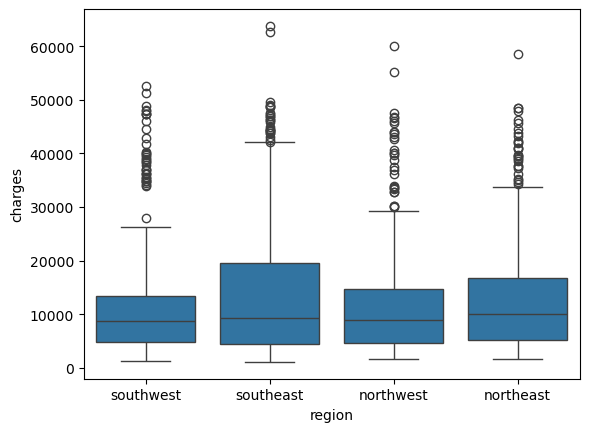

In [13]:
import seaborn as sns
sns.boxplot(x='region', y='charges', data=df)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
Label=LabelEncoder() 
df.sex=Label.fit_transform(df.sex)
df.smoker=Label.fit_transform(df.smoker)
df.region=Label.fit_transform(df.region)

In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


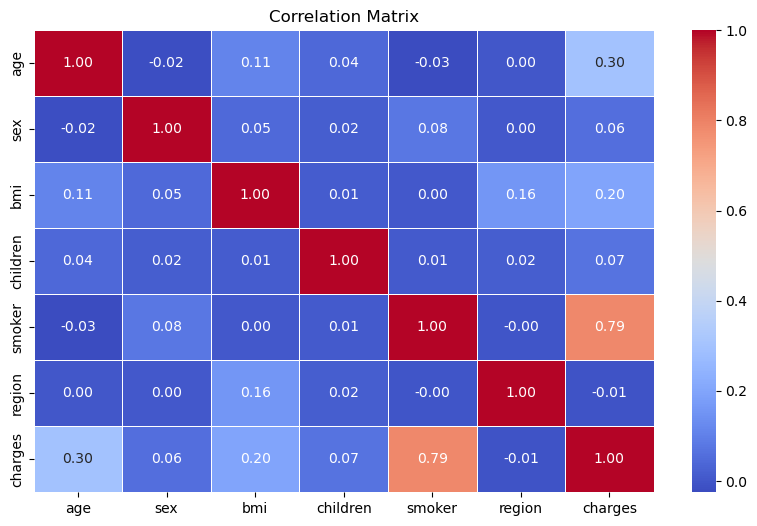

In [16]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and display the plot
plt.title('Correlation Matrix')
plt.show()


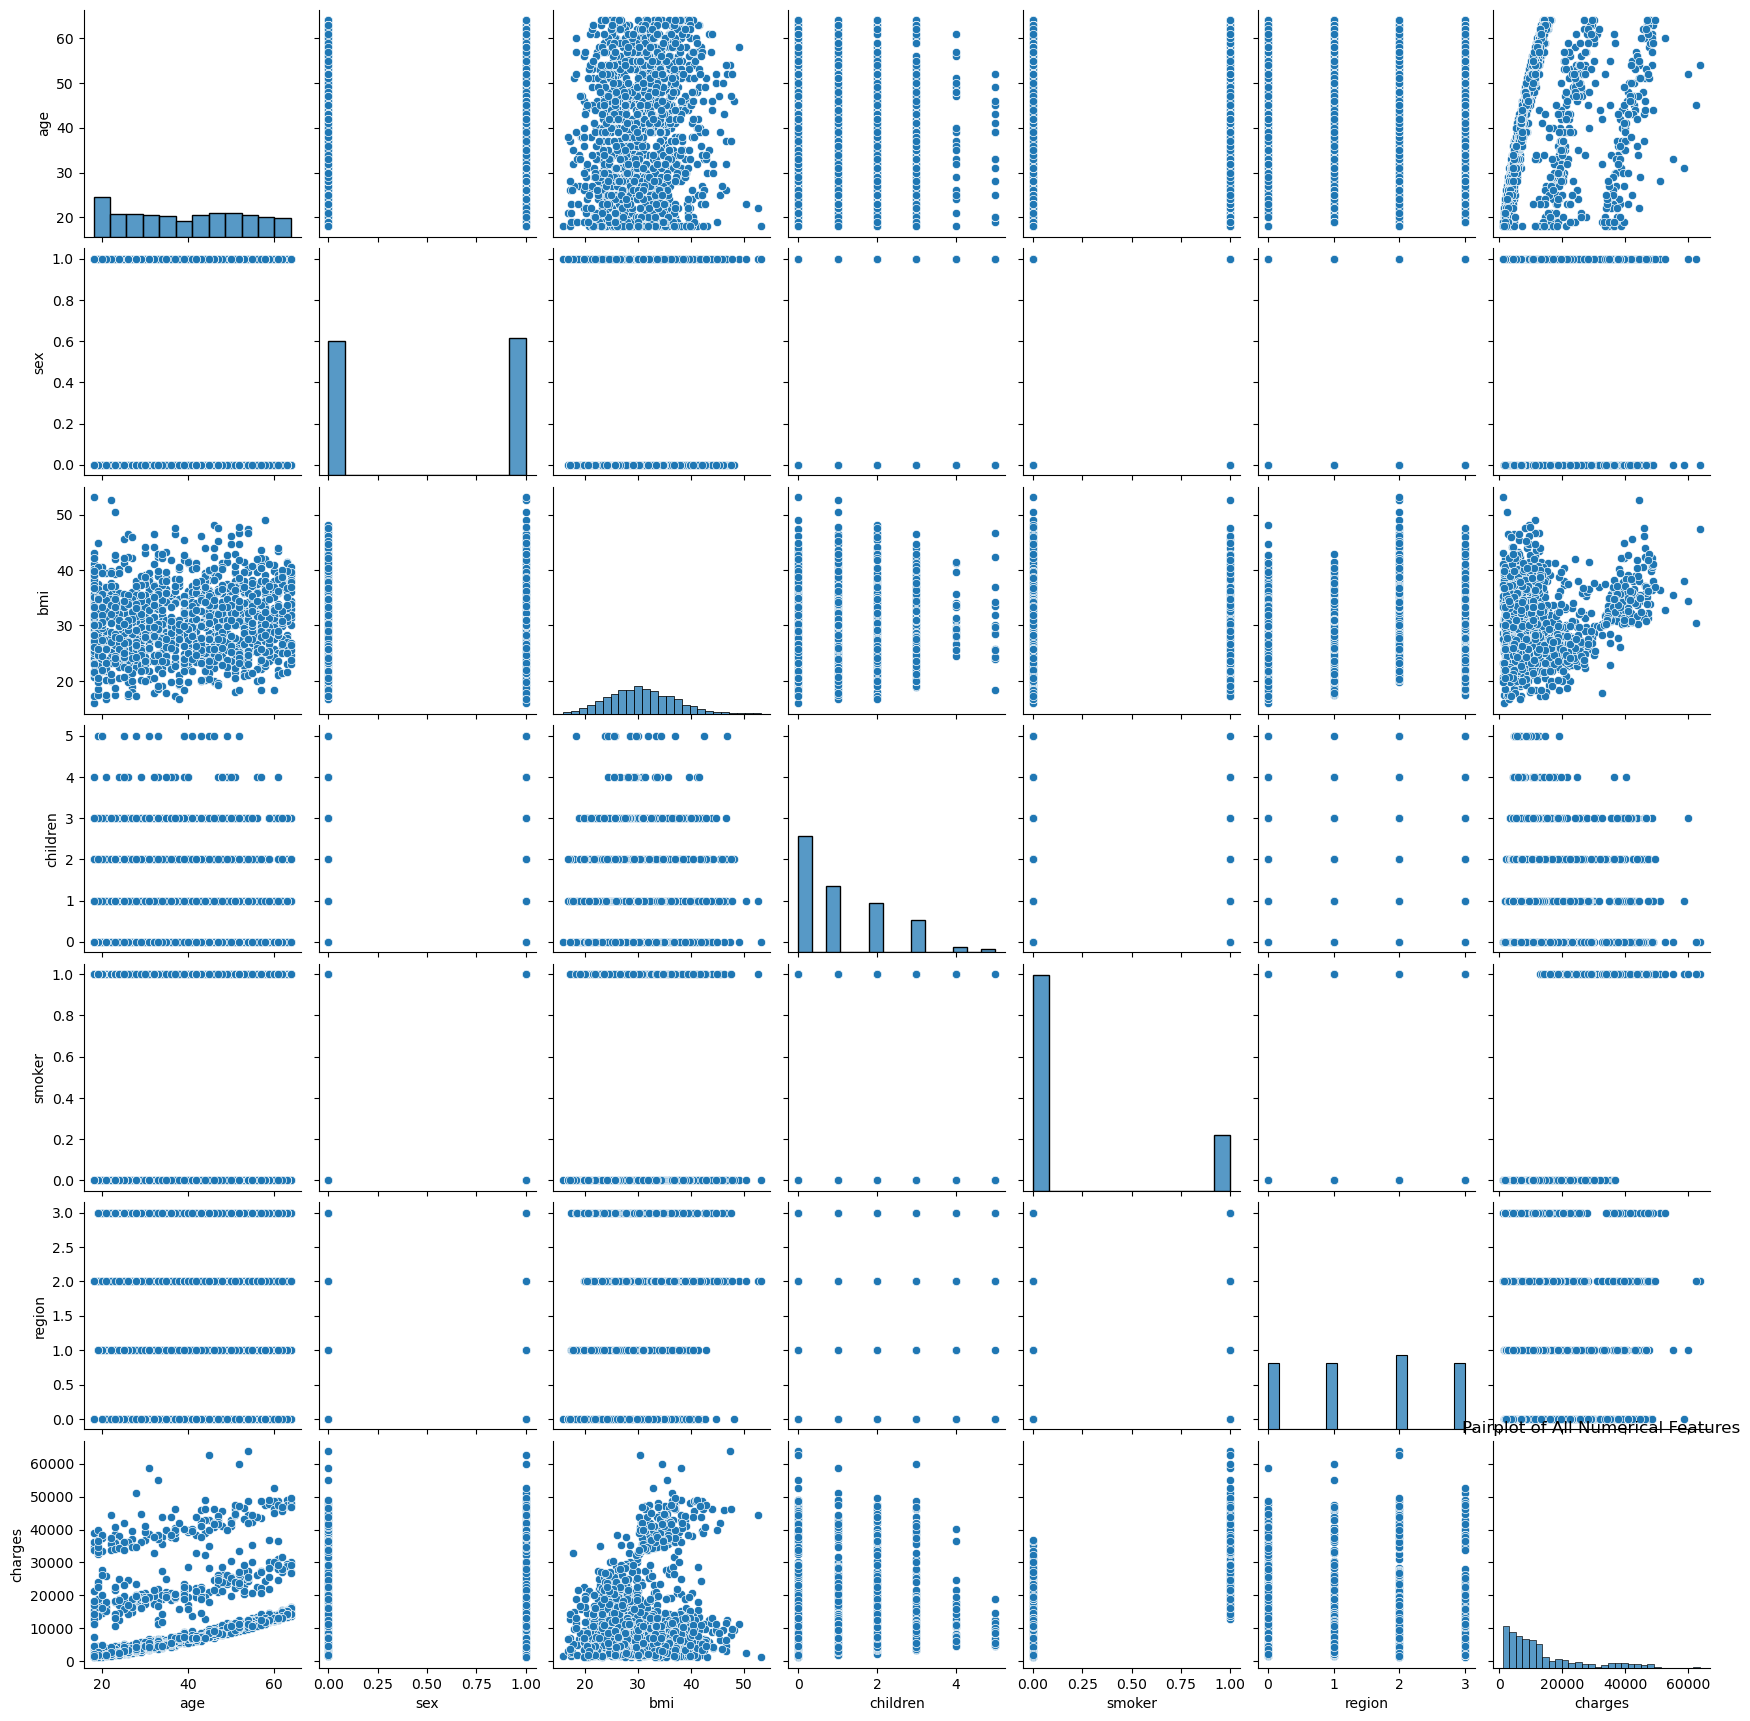

In [17]:
# Create a pairplot to visualize relationships between features
import seaborn as sns

sns.pairplot(df)
plt.title("Pairplot of All Numerical Features")
plt.show()

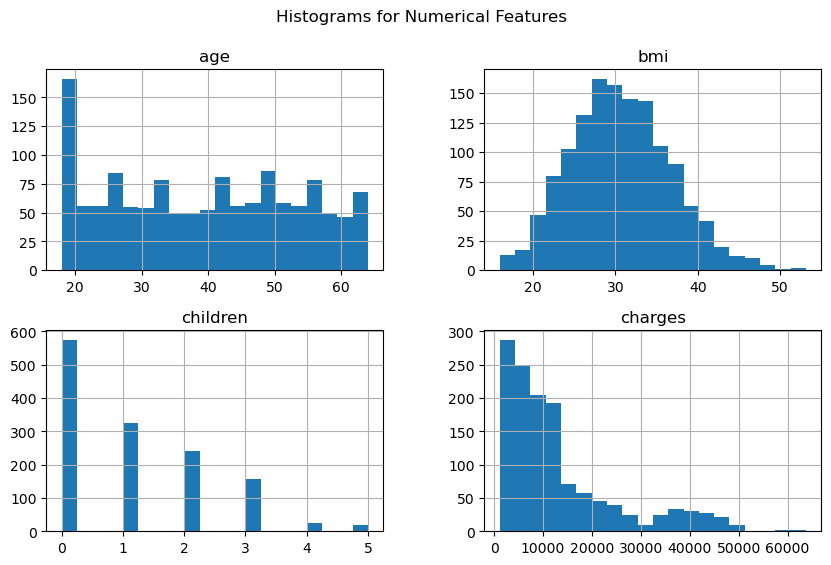

In [18]:
# Plot histograms for all numerical features
df[['age', 'bmi', 'children', 'charges']].hist(bins=20, figsize=(10, 6))
plt.suptitle("Histograms for Numerical Features")
plt.show()

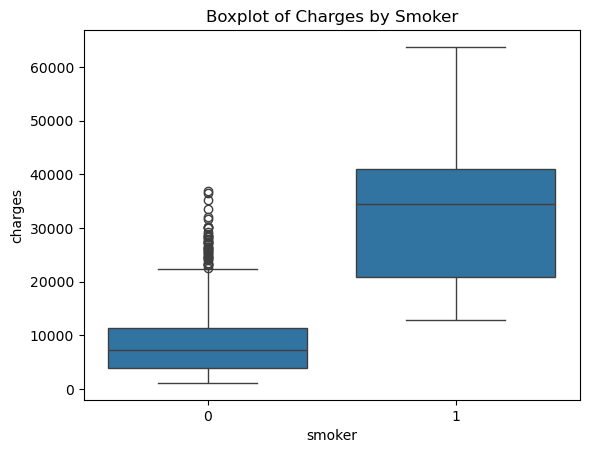

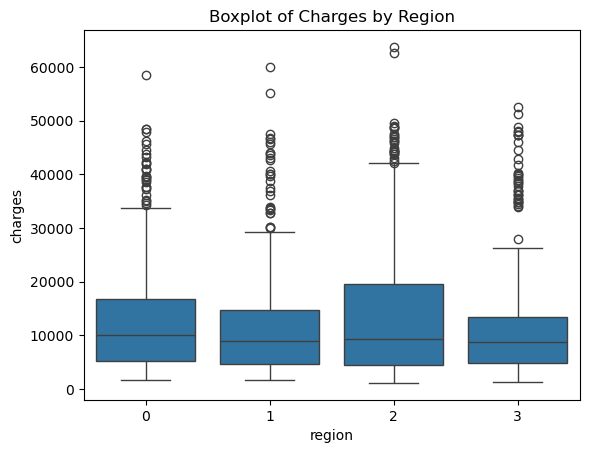

In [19]:
# Boxplot for 'charges' grouped by 'smoker'
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Boxplot of Charges by Smoker')
plt.show()

# Boxplot for 'charges' grouped by 'region'
sns.boxplot(x='region', y='charges', data=df)
plt.title('Boxplot of Charges by Region')
plt.show()

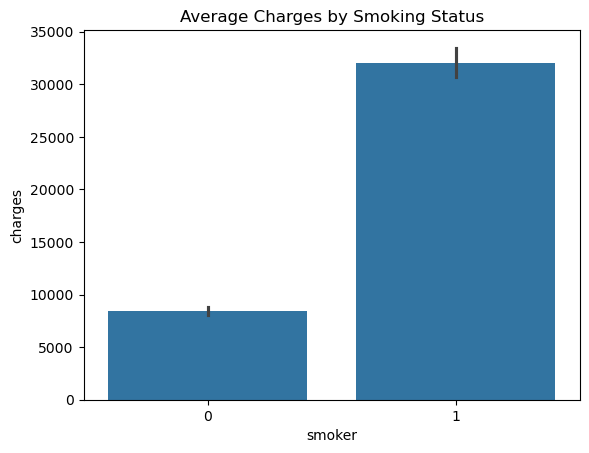

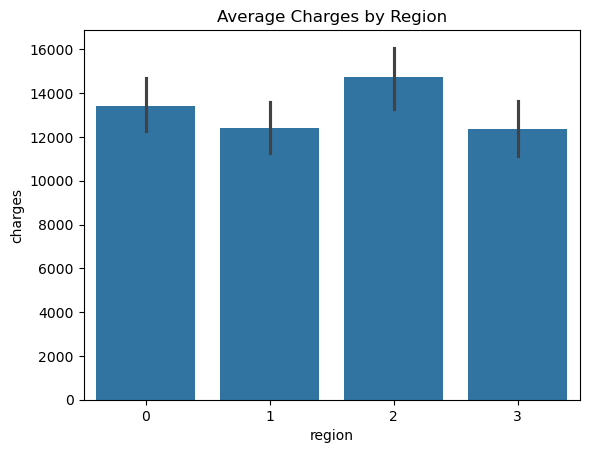

In [20]:
# Bar plot for charges by smoker
sns.barplot(x='smoker', y='charges', data=df)
plt.title("Average Charges by Smoking Status")
plt.show()

# Bar plot for charges by region
sns.barplot(x='region', y='charges', data=df)
plt.title("Average Charges by Region")
plt.show()

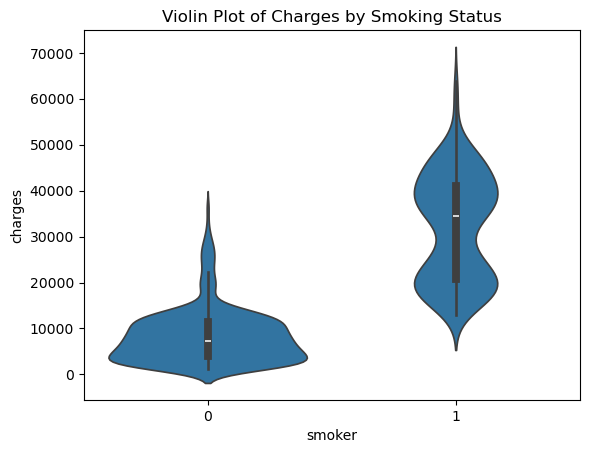

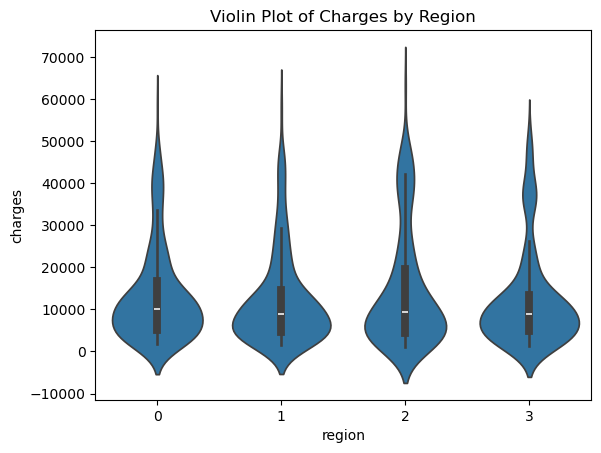

In [21]:
# Violin plot for charges by smoker
sns.violinplot(x='smoker', y='charges', data=df)
plt.title("Violin Plot of Charges by Smoking Status")
plt.show()

# Violin plot for charges by region
sns.violinplot(x='region', y='charges', data=df)
plt.title("Violin Plot of Charges by Region")
plt.show()

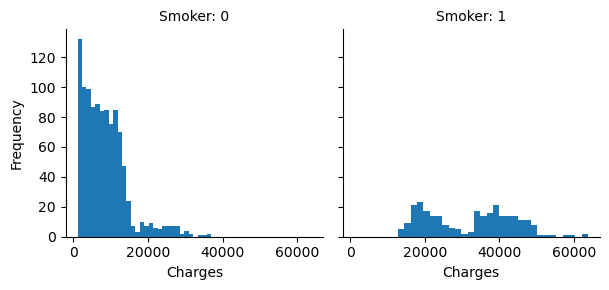

In [22]:
# Use FacetGrid to create subplots for 'charges' based on 'smoker'
g = sns.FacetGrid(df, col="smoker")
g.map(plt.hist, 'charges', bins=30)
g.set_axis_labels("Charges", "Frequency")
g.set_titles("Smoker: {col_name}")
plt.show()

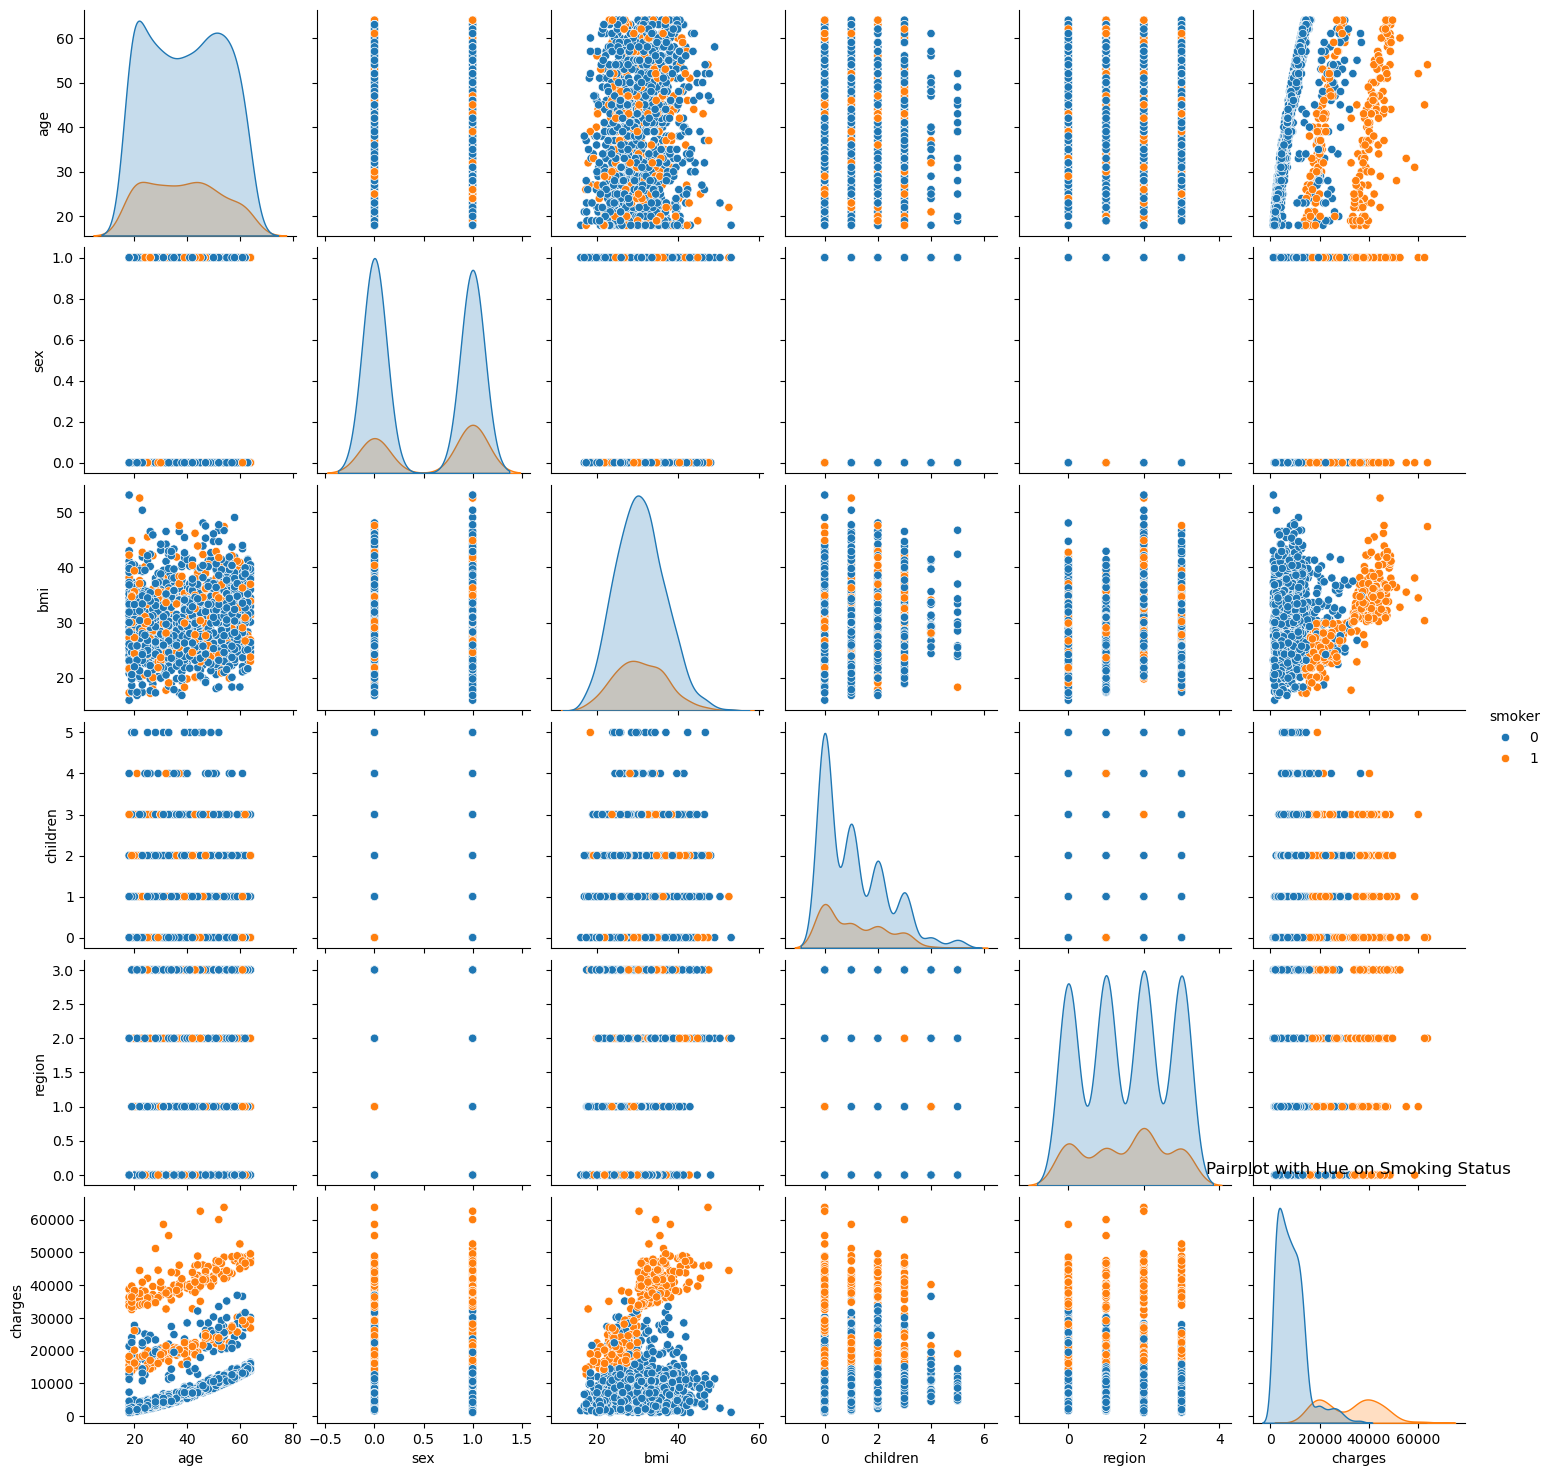

In [23]:
# Pairplot with hue to distinguish between smokers and non-smokers
sns.pairplot(df, hue="smoker")
plt.title("Pairplot with Hue on Smoking Status")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [25]:
x=df.drop(['charges'],axis=1) 
y=df.charges

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=0)

In [27]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)
y_predicted=model_1.predict(x_test) 
print("R² value for Linear Regression is :",r2_score(y_test,y_predicted))

R² value for Linear Regression is : 0.8215430369031267


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=44)
model_2=RandomForestRegressor()
model_2.fit(x_train,y_train)
y_predicted=model_2.predict(x_test) 
print ("R² value for Random Forest Regressor:",r2_score(y_test,y_predicted))

R² value for Random Forest Regressor: 0.9009121122651677


In [29]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [30]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [31]:
# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

In [32]:
# Fit the model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [33]:
# Predicting the test data
y_pred = dt_model.predict(X_test)

In [34]:
# Evaluating the model
dt_r2_score = r2_score(y_test, y_pred)
print("Decision Tree R2 Score:", dt_r2_score)

Decision Tree R2 Score: 0.6843565603663775


In [35]:
import xgboost as xgb
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [36]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [37]:
# Predict and evaluate using XGBoost
y_pred_xgb = xgb_model.predict(X_test)
xgb_r2_score = r2_score(y_test, y_pred_xgb)
print("XGBoost R2 Score:", xgb_r2_score)

XGBoost R2 Score: 0.8501678977480663


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=25)

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=99, learning_rate=.1, max_depth=3, random_state=25)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
r2_gb = r2_score(y_test, y_pred_gb)
print(f"R2 Score for Gradient Boosting Regressor: {r2_gb}")

R2 Score for Gradient Boosting Regressor: 0.9265692600150521


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=25)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror')
}

# Train models and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R²': r2}

# Display the results in a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                            MSE        R²
Linear Regression  3.458921e+07  0.753754
Decision Tree      3.457598e+07  0.753848
Random Forest      1.525379e+07  0.891406
Gradient Boosting  1.037143e+07  0.926164
XGBoost            2.028036e+07  0.855621


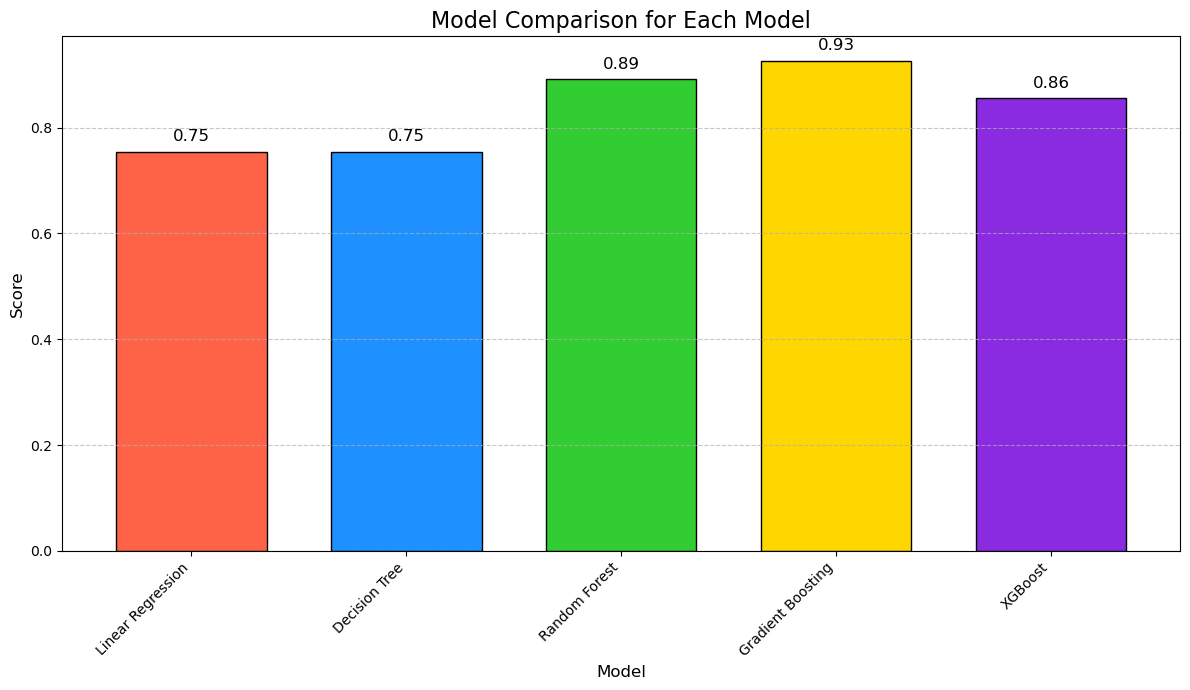

In [40]:
import matplotlib.pyplot as plt

# Custom colors for each model
colors = ['#FF6347', '#1E90FF', '#32CD32', '#FFD700', '#8A2BE2']

# Plot the R² values only with custom colors and borders
ax = results_df['R²'].plot(kind='bar', figsize=(12, 7), color=colors, edgecolor='black', width=0.7)

# Set the title and labels
plt.title('Model Comparison for Each Model', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display R² values on top of each bar
for i, v in enumerate(results_df['R²']):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12, color='black')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [41]:
import joblib

# Save the trained model
joblib.dump(gb_model, 'gb_model.pkl')


['gb_model.pkl']